In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
# def crop(img, ax0_min, ax0_max, ax1_min, ax1_max):
#     ax0_size = ax0_max - ax0_min
#     ax1_size = ax1_max - ax1_min
#     ax0_start = int(max(0, ax0_min - ax0_size*2))
#     ax1_start = int(max(0, ax1_min - ax1_size*2))
#     cropped = img[ax0_start: ax0_start + ax0_size *
#                   5, ax1_start: ax1_start + ax1_size*5]

In [3]:
filename = '../csv_detection_info/20_2, artrose.csv'
filename_clean = '../csv_detection_info_clean/20_2, artrose.csv'
saved_cropped_image = '//nmbu.no/LargeFile/Project/CubiAI/preprocess/cropped/20/2, artrose'

In [4]:
detection_df = pd.read_csv(filename)

In [5]:
detection_df

base_path  \
0    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
1    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
2    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
3    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
4    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
..                                                 ...   
129  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
130  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
131  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
132  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
133  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   

                                              filename  ax0_min  ax0_max  \
0    1.2.276.0.82.1.1.1430.332813960.192.168.1.110....      917     1105   
1    1.2.276.0.82.1.1.1430.332813960.192.168.1.110....      904     1097   
2    1.2.276.0.82.1.1.1430.332813960.192.168.1.110....      915     1107   
3    1.2.276.0.82.1.1.1430.641519430.192.168.1.153....      766      940   
4           1.2.276.0.95.16930.20200225.104135.0.0.dcm      626      759   
..                                                 ...      ...      ...   
129  1.3.51.0.7.42044072.38764.31296.45293.53055.32...      630      780   
130  1.3.51.0.7.547145504.4927.21067.38319.34206.18...      910     1068   
131  1.3.51.0.7.566355337.24764.13386.36985.8512.88...     1111     1295   
132  1.3.51.0.7.58634918.47328.44618.44357.45186.51...      896     1130   
133  1.3.51.0.7.819039937.11526.59457.34336.2319.21...      596      777   

     ax1_min  ax1_max  confidence  year  diagnosis diagnosis_raw  
0       1457     1645    0.929953    20          2    2, artrose  
1       1614     1806    0.950207    20          2    2, artrose  
2       1486     1678    0.981283    20          2    2, artrose  
3       1454     1629    0.999991    20          2    2, artrose  
4        716      849    0.999998    20          2    2, artrose  
..       ...      ...         ...   ...        ...           ...  
129      415      565    0.997669    20          2    2, artrose  
130     1317     1475    0.999986    20          2    2, artrose  
131     1758     1943    0.999990    20          2    2, artrose  
132     1523     1756    0.821825    20          2    2, artrose  
133      766      946    0.999996    20          2    2, artrose  

[134 rows x 10 columns]

### [Optional] Sort by confidence (filter out bad prediction)

In [6]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [7]:
detection_df[detection_df.confidence < 0.5]

base_path  \
12   //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
13   //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
14   //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
15   //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
38   //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
112  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   

                                              filename  ax0_min  ax0_max  \
12          1.2.276.0.95.17556.20200625.105022.0.0.dcm        0        0   
13          1.2.276.0.95.17556.20200625.105718.0.0.dcm        0        0   
14          1.2.276.0.95.17556.20200625.110827.0.0.dcm        0        0   
15          1.2.276.0.95.17556.20200625.111159.0.0.dcm        0        0   
38   1.2.276.0.95.31933.1.20210701.164235.0.2.18567...        0        0   
112  1.3.51.0.7.1781193155.10437.51777.39670.37307....     1201     1434   

     ax1_min  ax1_max  confidence  year  diagnosis diagnosis_raw  
12         0        0    0.000000    20          2    2, artrose  
13         0        0    0.000000    20          2    2, artrose  
14         0        0    0.000000    20          2    2, artrose  
15         0        0    0.000000    20          2    2, artrose  
38         0        0    0.000000    20          2    2, artrose  
112     2135     2372    0.310999    20          2    2, artrose

Note that there is one case that is not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [8]:
# plot every 9 of them

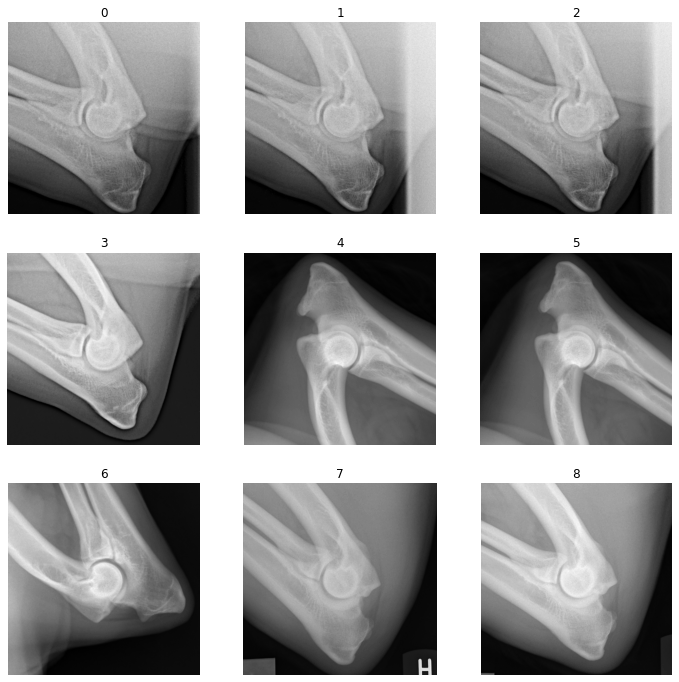

C:\NMBU\TEMP\ipykernel_12920\89006417.py:5: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')
C:\NMBU\TEMP\ipykernel_12920\89006417.py:5: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')


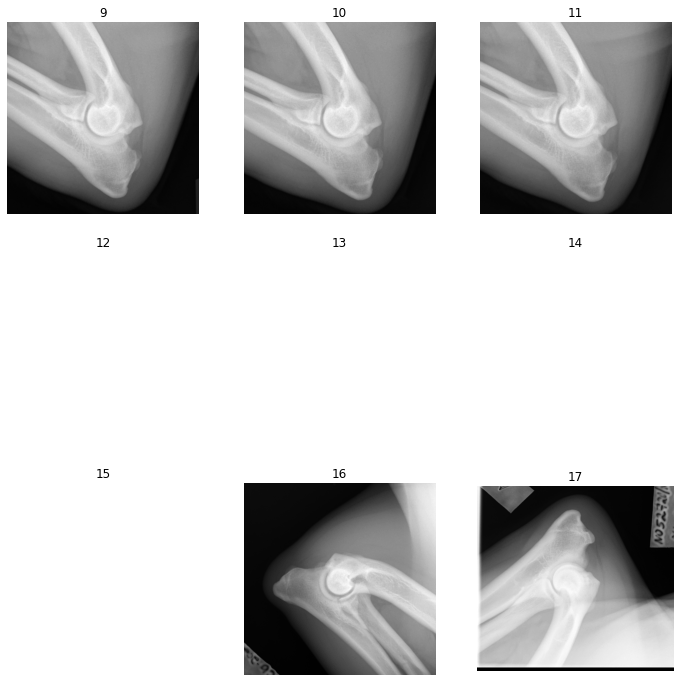

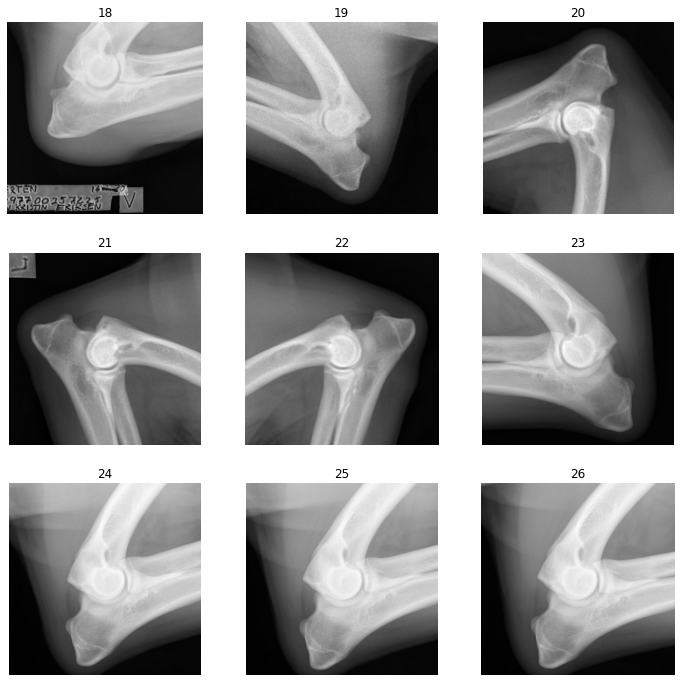

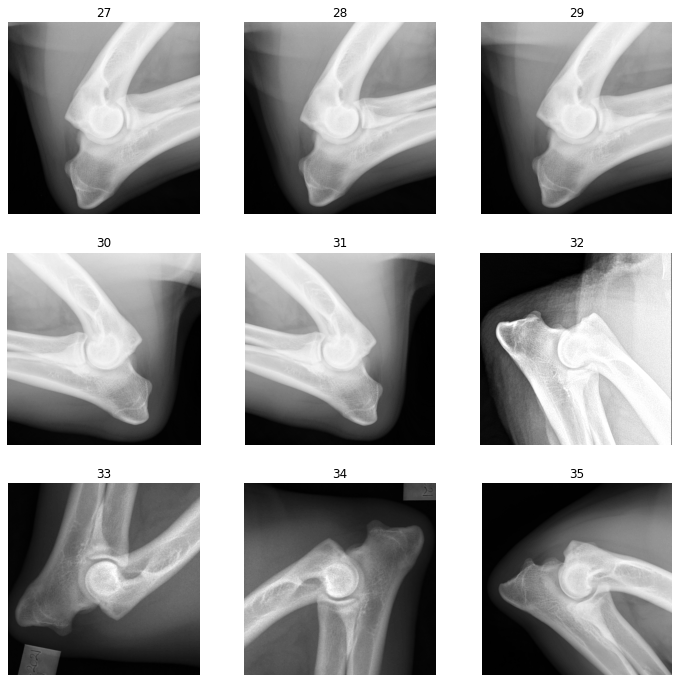

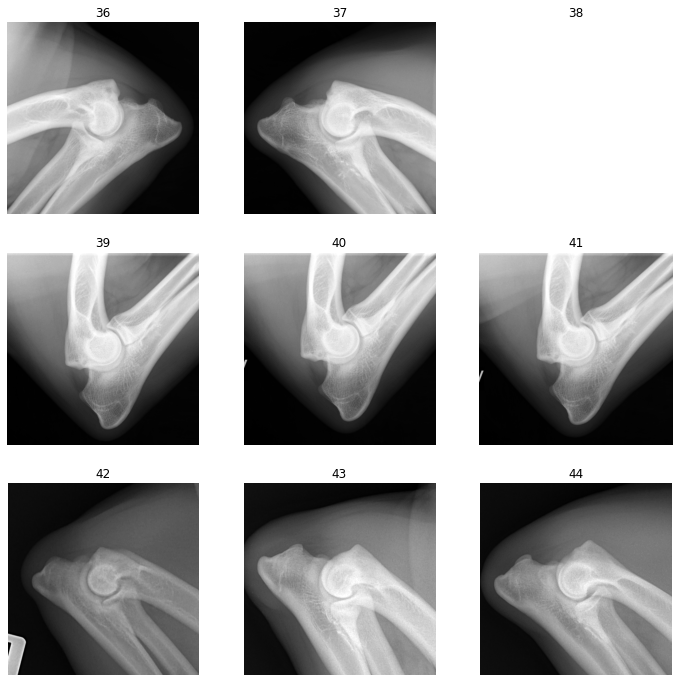

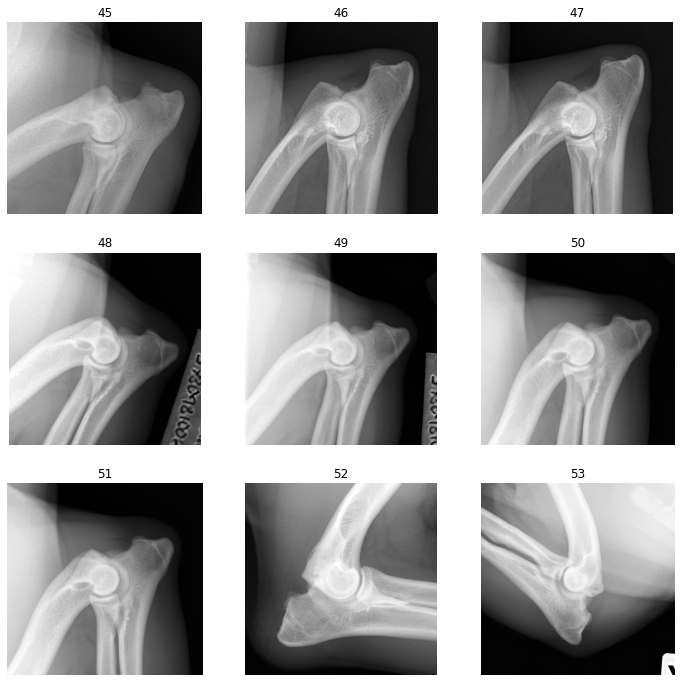

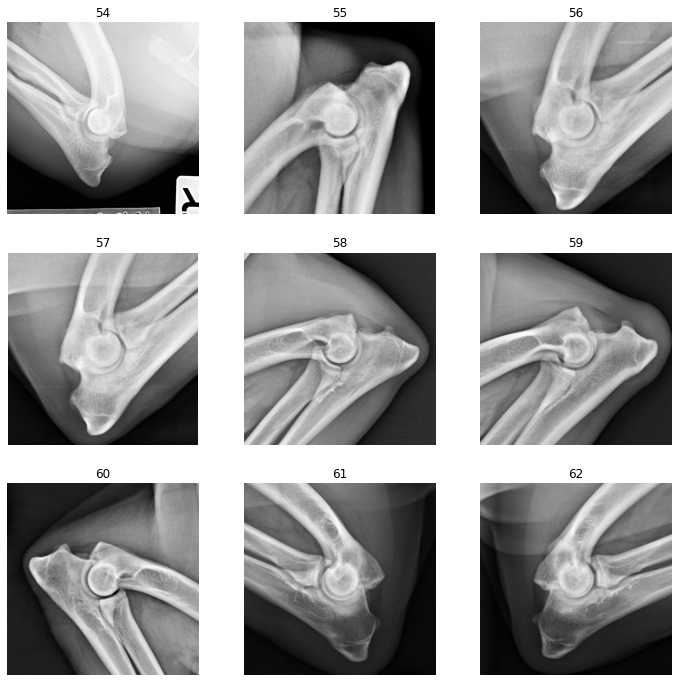

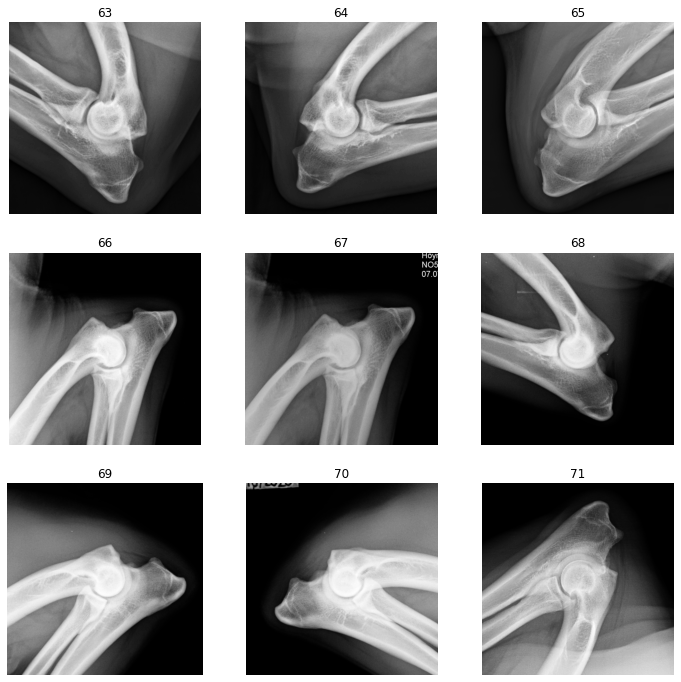

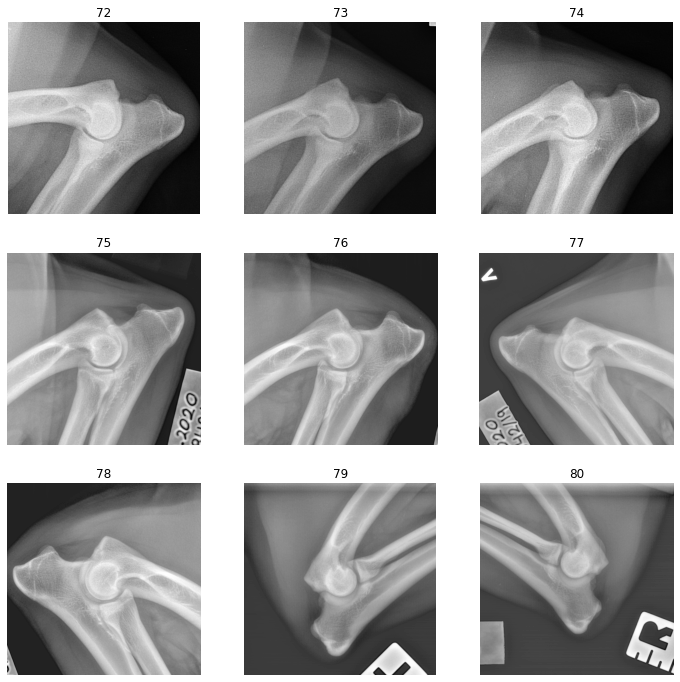

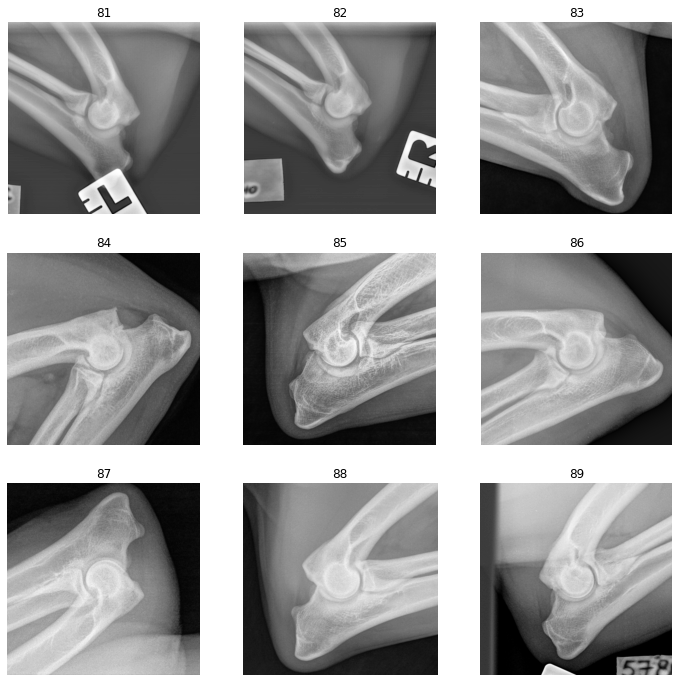

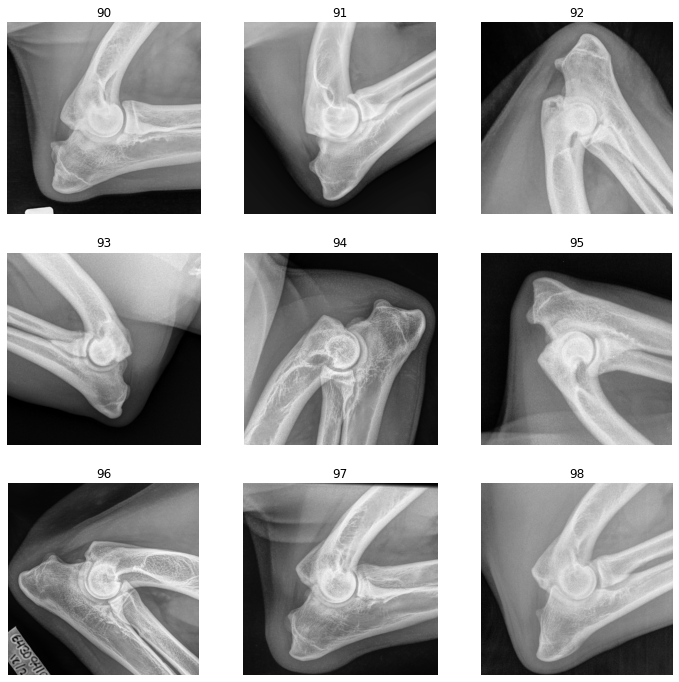

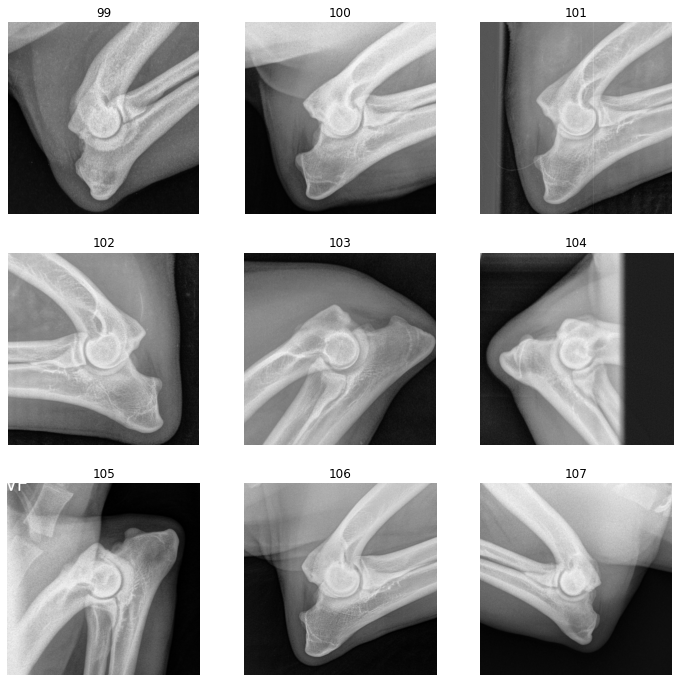

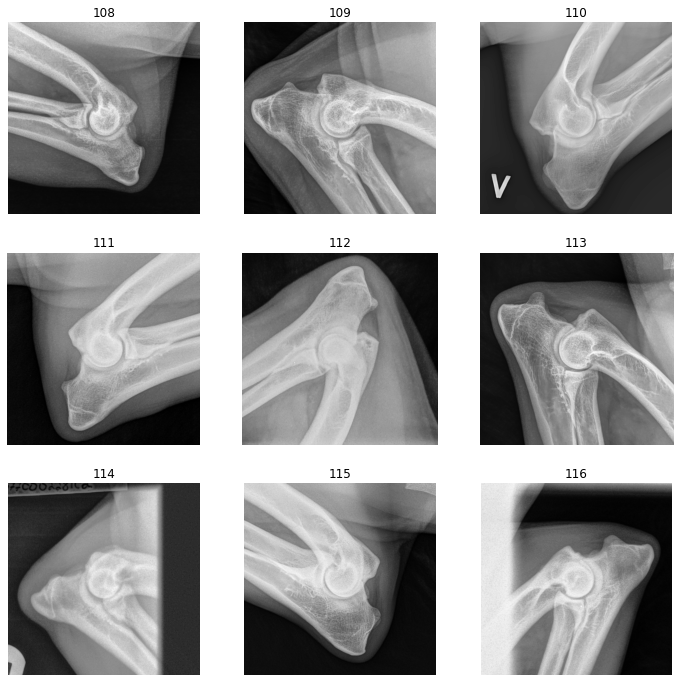

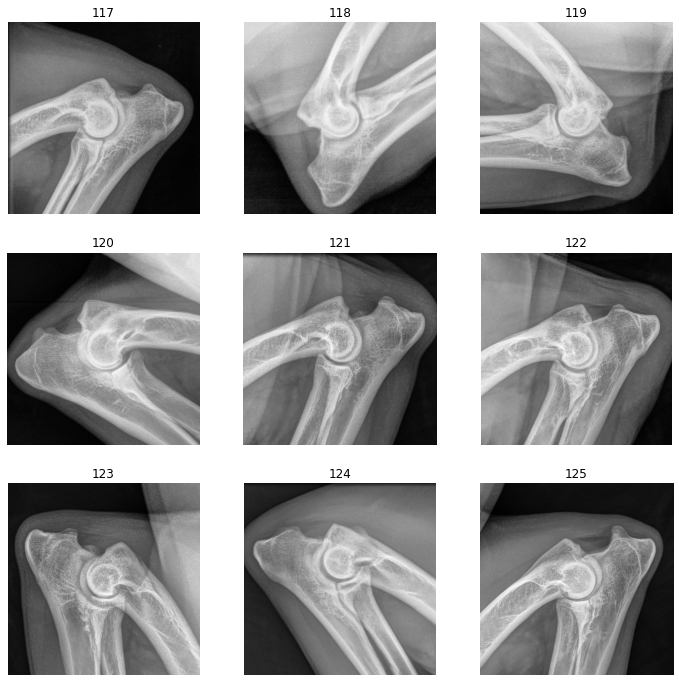

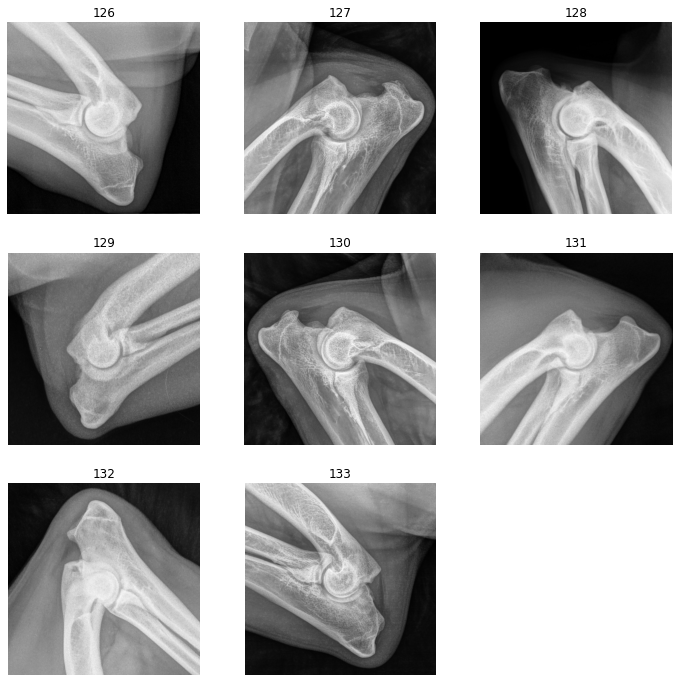

In [9]:
for id, item in detection_df.iterrows():
    fn = item['filename']
    img = np.load(saved_cropped_image + '/' + fn + '.npy')
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id))
    
    if (id%9) == 8:
        plt.show()
        
plt.show()

## Remove bad detection items

In [10]:
remove_indice = [12,13,14,15,38]
detection_df[~detection_df.index.isin(remove_indice)]

base_path  \
0    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
1    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
2    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
3    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
4    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
..                                                 ...   
129  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
130  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
131  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
132  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
133  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   

                                              filename  ax0_min  ax0_max  \
0    1.2.276.0.82.1.1.1430.332813960.192.168.1.110....      917     1105   
1    1.2.276.0.82.1.1.1430.332813960.192.168.1.110....      904     1097   
2    1.2.276.0.82.1.1.1430.332813960.192.168.1.110....      915     1107   
3    1.2.276.0.82.1.1.1430.641519430.192.168.1.153....      766      940   
4           1.2.276.0.95.16930.20200225.104135.0.0.dcm      626      759   
..                                                 ...      ...      ...   
129  1.3.51.0.7.42044072.38764.31296.45293.53055.32...      630      780   
130  1.3.51.0.7.547145504.4927.21067.38319.34206.18...      910     1068   
131  1.3.51.0.7.566355337.24764.13386.36985.8512.88...     1111     1295   
132  1.3.51.0.7.58634918.47328.44618.44357.45186.51...      896     1130   
133  1.3.51.0.7.819039937.11526.59457.34336.2319.21...      596      777   

     ax1_min  ax1_max  confidence  year  diagnosis diagnosis_raw  
0       1457     1645    0.929953    20          2    2, artrose  
1       1614     1806    0.950207    20          2    2, artrose  
2       1486     1678    0.981283    20          2    2, artrose  
3       1454     1629    0.999991    20          2    2, artrose  
4        716      849    0.999998    20          2    2, artrose  
..       ...      ...         ...   ...        ...           ...  
129      415      565    0.997669    20          2    2, artrose  
130     1317     1475    0.999986    20          2    2, artrose  
131     1758     1943    0.999990    20          2    2, artrose  
132     1523     1756    0.821825    20          2    2, artrose  
133      766      946    0.999996    20          2    2, artrose  

[129 rows x 10 columns]

In [11]:
new_detection_df = detection_df[~detection_df.index.isin(remove_indice)]

In [12]:
new_detection_df.to_csv(filename_clean, index=False)